In [1]:
%config InlineBackend.figure_format = "retina"
import pandas as pd
import numpy as np
from scipy.stats import f, t, chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid',  {"grid.color": '.95'})

In [2]:
poe5csv = 'http://principlesofeconometrics.com/poe5/data/csv/'
andy = pd.read_csv(poe5csv+'andy.csv')

andy['a2'] = andy.advert**2

resu = smf.ols('sales ~ price + advert + a2',data=andy).fit()
resr = smf.ols('sales ~ price',data=andy).fit()

J = resr.df_resid - resu.df_resid
fstat = ((resr.ssr-resu.ssr)/J) / (resu.ssr/resu.df_resid)
crit1 = f.ppf(0.95,J,resu.df_resid)
pvalue = 1-f.cdf(fstat,J,resu.df_resid)

print(f"         sseu: {resu.ssr:.4f}")
print(f"         sser: {resr.ssr:.4f}")
print(f"            J: {J:.0f}")
print(f"resu.df_resid: {resu.df_resid:.0f}")
print(f"        fstat: {fstat:.4f}")
print(f"       pvalue: {pvalue:.8f}")
print(f"        crit1: {crit1:.4f}")

         sseu: 1532.0845
         sser: 1896.3908
            J: 2
resu.df_resid: 71
        fstat: 8.4414
       pvalue: 0.00051416
        crit1: 3.1258


#### POE5 Example 6.2 The F-Test Procedure

In [3]:
hypotheses = '(advert = 0), (a2 = 0)'
J = 2
f_test = resu.f_test(hypotheses)
fstat = f_test.fvalue
crit1 = f.ppf(0.95,J,resu.df_resid)

print(f" fstat: {fstat:.4f}")
print(f"pvalue: {f_test.pvalue:.8f}")
print(f" crit1: {crit1:.4f}")

 fstat: 8.4414
pvalue: 0.00051416
 crit1: 3.1258


#### POE5 Example 6.3 Overall Significance of Burger Barns Equation



Here we want the restricted model to have no dependent variables (just a constant, which we must add.

In [4]:
# Unrestricted Model (all variables)
resu = smf.ols('sales ~ price + advert + a2',data=andy).fit()

# Restricted Model (no explanatory variables)
andy['one'] = 1
resr = smf.ols('sales ~ one',data=andy).fit()
J = resr.df_resid - resu.df_resid

hypotheses = '(price = 0), (advert = 0), (a2 = 0)'
f_test = resu.f_test(hypotheses)
fstat = f_test.fvalue
crit2 = f.ppf(0.95,J,resu.df_resid)

print(f"         sseu: {resu.ssr:.4f}")
print(f"         sser: {resr.ssr:.4f}")
print(f"            J: {J:.0f}")
print(f"resu.df_resid: {resu.df_resid:.0f}")
print(f"        fstat: {fstat:.4f}")
print(f"       pvalue: {f_test.pvalue:.5g}")
print(f"        crit2: {crit2:.4f}")
print(resu.summary().tables[1])

         sseu: 1532.0845
         sser: 3115.4819
            J: 3
resu.df_resid: 71
        fstat: 24.4593
       pvalue: 5.6e-11
        crit2: 2.7336
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.7190      6.799     16.137      0.000      96.162     123.276
price         -7.6400      1.046     -7.304      0.000      -9.726      -5.554
advert        12.1512      3.556      3.417      0.001       5.060      19.242
a2            -2.7680      0.941     -2.943      0.004      -4.644      -0.892


#### POE5 Example 6.4 Relation between t- and F-tests



In [5]:
# Unrestricted Model (all variables)
resu = smf.ols('sales ~ price + advert + a2',data=andy).fit()
hypothesis = '(price = 0)'
f_test = resu.f_test(hypothesis)
fstat = f_test.fvalue 
crit  = f.ppf(0.95,J,resu.df_resid)
tratio = resu.params.price/resu.bse.price

# Restricted Model
resr = smf.ols('sales ~ advert + a2',data=andy).fit()
J = resr.df_resid - resu.df_resid

print(f"         sseu: {resu.ssr:.4f}")
print(f"         sser: {resr.ssr:.4f}")
print(f"            J: {J:.0f}")
print(f"resu.df_resid: {resu.df_resid:.0f}")
print(f"        fstat: {fstat:.4f}")
print(f"       pvalue: {f_test.pvalue:.5g}")
print(f"        crit2: {crit:.4f}")
print(f"       tratio: {tratio:.4f}")
print(f"    tratio_sq: {tratio**2:.4f}")

         sseu: 1532.0845
         sser: 2683.4109
            J: 1
resu.df_resid: 71
        fstat: 53.3549
       pvalue: 3.2365e-10
        crit2: 2.7336
       tratio: -7.3044
    tratio_sq: 53.3549


#### POE5 Example 6.5 Testing Optimal Advertising


In [6]:
formula='sales ~ price + advert + a2'
res = smf.ols(formula, data=andy).fit()

hypothesis = 'advert + (3.8*a2) - 1'

f_test = res.f_test(hypothesis)
fstat = f_test.fvalue

t_test = res.t_test(hypothesis)
tvalue = t_test.tvalue.item(0)
pvalue = t_test.pvalue

print(f" fstat: {fstat:.8f}")
print(f"tvalue: {tvalue:.8f}")
print(f"pvalue: {pvalue:.4f}")
print(t_test.summary())

 fstat: 0.93619531
tvalue: 0.96757186
pvalue: 0.3365
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.6330      0.654      0.968      0.337       0.329       2.937


#### POE5 Example 6.6 A One-Tail Test


In [7]:
pval = pvalue/2
crit = t.ppf(0.95,res.df_resid)

print(f"tvalue: {tvalue:.7f}")
print(f"pvalue: {pval:.7f}")
print(f"  crit: {crit:.7f}")

tvalue: 0.9675719
pvalue: 0.1682713
  crit: 1.6665997


#### POE5 Example 6.7 Two (J-2) Complex Hypotheses


In [8]:
hypotheses = '(advert + 3.8*a2 - 1), \
    (6*price + 1.9*advert + 3.61*a2 + Intercept - 80)'
J = 2
f_test = res.f_test(hypotheses)
fstat = f_test.fvalue

print(f" fstat: {fstat:.4f}")
print(f"pvalue: {f_test.pvalue:.4e}")

 fstat: 5.7412
pvalue: 4.8847e-03


#### POE5 Example 6.2 and 6.5 Revisited
We need the chisquare number too as well - need toadd and replace the picture. 
add in the next box:
print(f"       chi2stat: {chi2stat:.4f}")
print(f"       chi2critl: {chi2critl:.4f}")
print(f"       chi2pvalue: {chi2pvalue:.8f}")

I don't know where this came from - Stata or book doesnt have this.

from scipy.stats import chi2
hypotheses = '(advert = 0), (a2 = 0)'
J = 2 # J = the number of restrictions (fix terminology!)

f_test = resu.f_test(hypotheses)

fstat = f_test.fvalue
crit1 = f.ppf(0.95,J,resu.df_resid)

chi2pvalue = chi2.sf(J*fstat,J) # Survival Function

print(f"        fstat: {fstat:.4f}")
print(f"        crit1: {crit1:.4f}")
print(f"       pvalue: {f_test.pvalue:.8f}")

In [9]:
hypothesis = 'advert + (3.8*a2) -1'

f_test = res.f_test(hypothesis)
fstat = f_test.fvalue
fpvalue = f_test.pvalue

J = 1
df = res.df_resid
chi2pvalue = chi2.sf(J*fstat,J) 

print(f"     fstat: {fstat:.8f}")
print(f"        df: {df:.8f}")
print(f"   fpvalue: {fpvalue:.8f}")
print(f"chi2pvalue: {chi2pvalue:.8f}")

     fstat: 0.93619531
        df: 71.00000000
   fpvalue: 0.33654267
chi2pvalue: 0.33325824


#### POE5 Example 6.8 A Nonlinear Hypothesis



In [10]:
mod1=smf.ols('sales ~ price + advert + a2',data=andy).fit()
b1,b2,b3,b4=mod1.params
c=1.9
g=(1-b3)/(2*b4)
d3=-1/(2*b4)
d4=-(1-b3)/(2*b4**2)
a=np.array([0,0,d3,d4])
seg=np.sqrt(a.T.dot(mod1.cov_params()).dot(a))
tv=(g-c)/seg
chisq=F=tv**2
dfd=mod1.nobs-len(mod1.params)
Fpval=1-f.cdf(F,1,dfd)
chi2pval=1-chi2.cdf(chisq,1)

print(f"     tstat: {tv:.8f}")
print(f"fstat=chi2: {chisq:.8f}")
print(f"   fpvalue: {Fpval:.8f}")
print(f"chi2pvalue: {chi2pval:.8f}")

     tstat: 0.88826105
fstat=chi2: 0.78900769
   fpvalue: 0.37739976
chi2pvalue: 0.37440035


#### POE5 Example 6.9: Restricted Least Squares

See https://www.statsmodels.org/dev/examples/notebooks/generated/recursive_ls.html#Example-3:-Linear-restrictions-and-formulas


In [11]:
beer = pd.read_csv(poe5csv+'beer.csv')

beer['lq']  = np.log(beer.q)
beer['lpb'] = np.log(beer.pb)
beer['lpl'] = np.log(beer.pl)
beer['lpr'] = np.log(beer.pr)
beer['li']  = np.log(beer.i)

formula='lq ~ lpb + lpl + lpr + li'
constraint = 'lpb + lpl + lpr + li = 0'
res = sm.RecursiveLS.from_formula(formula, constraints=constraint, data=beer).fit()

print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.7978      3.714     -1.292      0.196     -12.077       2.481
lpb           -1.2994      0.166     -7.840      0.000      -1.624      -0.975
lpl            0.1868      0.284      0.657      0.511      -0.371       0.744
lpr            0.1667      0.077      2.163      0.031       0.016       0.318
li             0.9458      0.427      2.215      0.027       0.109       1.783


#### POE5 Example 6.10 Family Income Equation

In [12]:
eduinc = pd.read_csv(poe5csv+'edu_inc.csv')

eduinc['lfaminc'] =  np.log(eduinc.faminc)

reshw = smf.ols('lfaminc ~ hedu + wedu', data=eduinc).fit()
print(reshw.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2647      0.122     84.141      0.000      10.025      10.505
hedu           0.0439      0.009      5.028      0.000       0.027       0.061
wedu           0.0390      0.012      3.369      0.001       0.016       0.062


In [13]:
resh = smf.ols('lfaminc ~ hedu', data=eduinc).fit()

print(resh.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5385      0.092    114.436      0.000      10.358      10.720
hedu           0.0613      0.007      8.638      0.000       0.047       0.075


In [14]:
print(f"Correlation b/n hedu and wedu = {eduinc.corr().hedu.wedu:.2f}")
print(f"Correlation Matrix:")
print(eduinc.corr())

Correlation b/n hedu and wedu = 0.59
Correlation Matrix:
           faminc      hedu      wedu       kl6   xtra_x5   xtra_x6   lfaminc
faminc   1.000000  0.354684  0.362328 -0.071956  0.289817  0.351366  0.920109
hedu     0.354684  1.000000  0.594343  0.104877  0.836168  0.820563  0.386048
wedu     0.362328  0.594343  1.000000  0.129340  0.517798  0.799306  0.349110
kl6     -0.071956  0.104877  0.129340  1.000000  0.148742  0.159522 -0.085485
xtra_x5  0.289817  0.836168  0.517798  0.148742  1.000000  0.900206  0.315066
xtra_x6  0.351366  0.820563  0.799306  0.159522  0.900206  1.000000  0.363643
lfaminc  0.920109  0.386048  0.349110 -0.085485  0.315066  0.363643  1.000000


#### POE5 Example 6.11 Adding Children Aged Less Than 6 Years

In [15]:
reshwk = smf.ols('lfaminc ~ hedu + wedu + kl6', data=eduinc).fit()

print(reshwk.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2378      0.121     84.619      0.000      10.000      10.476
hedu           0.0448      0.009      5.191      0.000       0.028       0.062
wedu           0.0421      0.012      3.662      0.000       0.020       0.065
kl6           -0.1733      0.054     -3.196      0.001      -0.280      -0.067


#### POE5 Example 6.12 Adding Irrelevent Variables

In [16]:
formula = 'lfaminc ~ hedu + wedu + kl6 + xtra_x5 + xtra_x6'
reshwk = smf.ols(formula=formula, data=eduinc).fit()

print(reshwk.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2393      0.121     84.366      0.000      10.001      10.478
hedu           0.0460      0.014      3.396      0.001       0.019       0.073
wedu           0.0492      0.025      1.993      0.047       0.001       0.098
kl6           -0.1724      0.055     -3.153      0.002      -0.280      -0.065
xtra_x5        0.0054      0.024      0.222      0.825      -0.042       0.053
xtra_x6       -0.0069      0.021     -0.323      0.747      -0.049       0.035


### 6.3.3 Choosing the Model
#### Model Selection Criteria

There is a package `pystout.py` (https://github.com/lucashusted/pystout) that will output a table similar to that produced by the Stata command `esttab`.  Note that you must install this package yourself if you want to use it, as it is not part of the standard Python installation.  Install with the command `pip install pystout`.  

The example below will compute 5 different regressions and output the results to a LaTeX table.  You may not be a LaTeX user, but that's OK.  Open up the output file in a standard text editor (e.g., Wordpad), and copy everything to the clipboard.  Visit the website https://quicklatex.com and paste your table and click the Render! button.  You'll get a formatted table presented as a PNG image that you can copy into a Word document or PowerPoint presentation.  


In [17]:
from pystout import pystout

formula = 'lfaminc ~ hedu + wedu'
model1 = smf.ols(formula=formula, data=eduinc).fit()

formula = 'lfaminc ~ hedu'
model2 = smf.ols(formula=formula, data=eduinc).fit()

formula = 'lfaminc ~ hedu + wedu + kl6'
model3 = smf.ols(formula=formula, data=eduinc).fit()

formula = 'lfaminc ~ hedu + wedu + kl6 + xtra_x5 + xtra_x6'
model4 = smf.ols(formula=formula, data=eduinc).fit()

formula = 'lfaminc ~ hedu + kl6 + xtra_x5 + xtra_x6'
model5 = smf.ols(formula=formula, data=eduinc).fit()

pystout(models=[model1,model2,model3,model4,model5],
        file='Model_Select_table.tex',
        digits=3,
        modstat={'nobs':'N','rsquared':'R\\sym{2}',\
                 'rsquared_adj':'Adj. R\\sym{2}',\
                 'aic':'AIC','bic':'BIC'},
        stars={.05:'*',0.01:"**",0.001:'***'},
        addnotes=['Standard errors in parentheses',
                  '* p<0.05, ** p<0.01, *** p<0.001'])

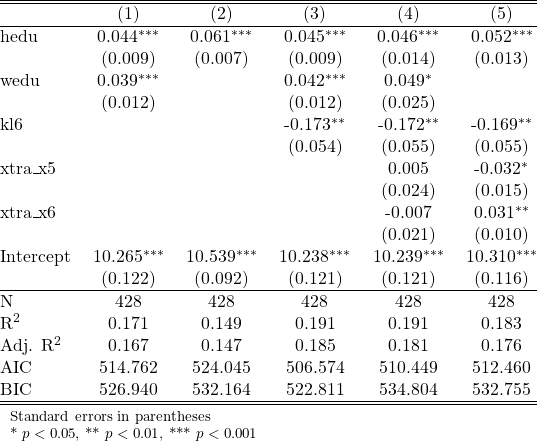

#### POE5 Example 6.14 Applying RESET to Family Income Equation


In [18]:
from statsmodels.stats.diagnostic import linear_reset

formula = 'lfaminc ~ hedu + wedu + kl6'
res = smf.ols(formula=formula, data=eduinc).fit()
res_np = sm.OLS(res.model.endog, res.model.exog).fit()

lr2 = linear_reset(res_np,power=2,use_f=True)
print(f"F{lr2.dist_args} = {lr2.statistic:.4f}")
print(f"Prob > F = {lr2.pvalue:.2f}\n")

lr3 = linear_reset(res_np,power=3,use_f=True)
print(f"F{lr3.dist_args} = {lr3.statistic:.4f}")
print(f"Prob > F = {lr3.pvalue:.2f}")

F(1.0, 423.0) = 1.7383
Prob > F = 0.19

F(2.0, 422.0) = 1.2783
Prob > F = 0.28


#### POE5 Example 6.13 A Control Variable for Ability

In [19]:
kt87 = pd.read_csv(poe5csv+'koop_tobias_87.csv')

kt87['lwage'] = np.log(kt87.wage)
kt87['exper2'] = kt87.exper**2

formula = 'lwage ~ educ + exper + exper2'
res = smf.ols(formula=formula, data=kt87).fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8872      0.293      3.030      0.003       0.313       1.462
educ           0.0728      0.009      8.013      0.000       0.055       0.091
exper          0.1268      0.040      3.150      0.002       0.048       0.206
exper2        -0.0057      0.002     -3.453      0.001      -0.009      -0.002


In [20]:
formula = 'lwage ~ educ + exper + exper2 + score'
res = smf.ols(formula=formula, data=kt87).fit()
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0547      0.297      3.555      0.000       0.473       1.637
educ           0.0592      0.010      5.881      0.000       0.039       0.079
exper          0.1231      0.040      3.067      0.002       0.044       0.202
exper2        -0.0054      0.002     -3.262      0.001      -0.009      -0.002
score          0.0604      0.020      3.089      0.002       0.022       0.099


#### POE5 Example 6.15 Forecasting SALES for the Burger Barn


In [21]:
formula='sales ~ price + advert + a2'
res = smf.ols(formula, data=andy).fit()

new_data = pd.DataFrame({'price':[6],'advert':[1.9],'a2':[1.9**2]})
yhat = res.predict(new_data)

tc = t.ppf(0.975,res.df_resid)

pred_res = res.get_prediction(exog=new_data)

yhat = pred_res.predicted_mean[0]
se_obs = pred_res.se_obs[0]

print(f"The prediction standard error is {pred_res.se_mean[0]:.4f}")
print(f"The forcast standard error is {pred_res.se_obs[0]:.4f}")
print(f"The 95% confidence interval centered at {yhat:.3f}"\
      +f"is ({yhat-tc*se_obs:.3f}, {yhat+tc*se_obs:.3f})")

The prediction standard error is 0.9177
The forcast standard error is 4.7351
The 95% confidence interval centered at 76.974is (67.533, 86.415)


#### POE5 Example 6.16 Predicting House Prices

In [22]:
br5 = pd.read_csv(poe5csv+'br5.csv')

br5['lprice']  = np.log(br5.price)
br5['age2']    = br5.age**2
br5['sqft2']   = br5.sqft**2
br5['agesqft'] = br5.age * br5.sqft

train = br5[:800]
test  = br5[800:]

def aic(r):
    return np.log(r.ssr/r.nobs) + 2*(r.df_model+1)/r.nobs
def bic(r):
    return np.log(r.ssr/r.nobs) + (r.df_model+1)*np.log(r.nobs)/r.nobs

f1 = 'lprice ~ age + sqft'
f2 = f1+' + age2'
f3 = f1+' + sqft2'
f4 = f1+' + agesqft'
f5 = f1+' + age2 + sqft2'
f6 = f1+' + age2 + agesqft'
f7 = f1+' + sqft2 + agesqft'
f8 = f1+' + sqft2 + age2 + agesqft'
formula = [f1,f2,f3,f4,f5,f6,f7,f8]
vbls = ['None','AGE**2','SQFT**2','AGExSQFT','AGE**2, SQFT**2',
        'AGE**2, AGExSQFT','SQFT**2, AGExSQFT',
        'AGE**2, SQFT**2, AGExSQFT']

def rmse(f,r):
    res = smf.ols(formula=f, data=train).fit()
    pred_res = res.get_prediction(exog=test)
    return np.sqrt((1/100)*sum((test.lprice-pred_res.predicted_mean)**2))

df = pd.DataFrame({})

for f,v in zip(formula,vbls):
    r = smf.ols(formula=f, data=br5).fit()
    df = pd.concat([df,pd.DataFrame({'Variables':[v],'R2':[r.rsquared],
                                   'R2_adj':[r.rsquared_adj],
                                   'AIC':[aic(r)],'BIC':[bic(r)],
                                   'RMSE':[rmse(f,r)]})])

print(df.to_string(index=False))

                Variables       R2   R2_adj       AIC       BIC     RMSE
                     None 0.698496 0.697824 -2.534467 -2.518459 0.279074
                   AGE**2 0.720690 0.719755 -2.608706 -2.587362 0.271362
                  SQFT**2 0.699185 0.698177 -2.534529 -2.513185 0.284112
                 AGExSQFT 0.699627 0.698622 -2.536003 -2.514659 0.278959
          AGE**2, SQFT**2 0.720839 0.719591 -2.607014 -2.580334 0.275393
         AGE**2, AGExSQFT 0.720994 0.719747 -2.607572 -2.580892 0.271232
        SQFT**2, AGExSQFT 0.700613 0.699275 -2.537066 -2.510386 0.284044
AGE**2, SQFT**2, AGExSQFT 0.721221 0.719662 -2.606164 -2.574148 0.275429


#### POE5 Example 6.17 Collinearity in a Rice Production Function

In [23]:
usecols = ['area','fert','labor','prod','year']
rice5 = pd.read_csv(poe5csv+'rice5.csv',usecols=usecols)

cols = ['area','fert','labor','prod']
print(rice5[cols].describe(percentiles=[]).transpose())
print("Correlation Matrix")
print(rice5[cols].corr())

       count        mean         std   min      50%     max
area    88.0    2.120227    1.419989   0.2    1.750    5.50
fert    88.0  176.418182  154.270552  10.0  128.650  595.70
labor   88.0  107.392045   71.115797  11.0   90.500  381.00
prod    88.0    6.168636    4.849442   0.6    4.995   21.07
Correlation Matrix
           area      fert     labor      prod
area   1.000000  0.853139  0.909333  0.834659
fert   0.853139  1.000000  0.865619  0.858432
labor  0.909333  0.865619  1.000000  0.886456
prod   0.834659  0.858432  0.886456  1.000000


In [24]:
rice5['larea'] = np.log(rice5['area'])
rice5['lfert'] = np.log(rice5['fert'])
rice5['llabor'] = np.log(rice5['labor'])
rice5['lprod'] = np.log(rice5['prod'])

lcols = ['larea','lfert','llabor','lprod']
print(rice5[lcols].corr(),"\n")

r5y94 = rice5[rice5.year == 1994]

formula = 'lprod ~ larea + llabor + lfert'
res = smf.ols(formula=formula,data=r5y94).fit()
print(res.summary().tables[1])

           larea     lfert    llabor     lprod
larea   1.000000  0.838686  0.931953  0.885636
lfert   0.838686  1.000000  0.878999  0.898061
llabor  0.931953  0.878999  1.000000  0.912960
lprod   0.885636  0.898061  0.912960  1.000000 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9473      0.738     -2.637      0.012      -3.440      -0.455
larea          0.2106      0.182      1.157      0.254      -0.157       0.579
llabor         0.3776      0.255      1.480      0.147      -0.138       0.893
lfert          0.3433      0.128      2.682      0.011       0.085       0.602


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_cols = ['larea','lfert','llabor']
X = r5y94[vif_cols].assign(const=1)
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])],index=X.columns)

print(vif.to_string())

larea       9.149377
lfert       7.683995
llabor     17.733853
const     244.574170




Note: Can suppress warning message by uncomenting first line

In [26]:
import warnings
warnings.simplefilter(action='ignore')

formula='lprod ~ larea + llabor + lfert'
constraint = 'larea + llabor + lfert = 1'
res = sm.RecursiveLS.from_formula(formula, constraints=constraint, data=r5y94).fit()

print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1683      0.706     -3.069      0.002      -3.553      -0.784
larea          0.2262      0.182      1.246      0.213      -0.130       0.582
llabor         0.4834      0.233      2.073      0.038       0.026       0.940
lfert          0.2904      0.117      2.480      0.013       0.061       0.520


**Here run for both years in the original DataFrame rice5**

In [27]:
res_9394 = smf.ols(formula=formula,data=rice5).fit()
print(res_9394.summary().tables[1])

X = rice5[vif_cols].assign(const=1)
vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])],index=X.columns)

print(vif.to_string())

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8694      0.457     -4.095      0.000      -2.777      -0.962
larea          0.2108      0.108      1.947      0.055      -0.005       0.426
llabor         0.3997      0.131      3.059      0.003       0.140       0.659
lfert          0.3195      0.064      5.030      0.000       0.193       0.446
larea       7.704657
lfert       4.454975
llabor     10.051189
const     223.335710


**POE5 Example 6.18**

In [28]:
br5 = pd.read_csv(poe5csv+'br5.csv')
br5.index += 1   # For comparison with POE5 (start count at 1)

N = len(br5)
br5['lprice']  = np.log(br5.price)
br5['age2'] = br5.age**2

res18 = smf.ols('lprice ~ sqft + age + age2',data=br5).fit()

influence = res18.get_influence()

# DFBETA columns
br5['dfb_sqft'] = influence.dfbetas[:,1]
br5['dfb_age'] = influence.dfbetas[:,2]
br5['dfb_age2'] = influence.dfbetas[:,3]

# print the first 5 DFBETAs for the AGE coefficient
cols = ['sqft','age','dfb_age']
print(br5[abs(br5.dfb_age) > 2/np.sqrt(N)][cols].head())
print("\nThreshold: 2/SQRT(N)=0.067")

# to print the 5 largest and smallest DFBETA by AGE
print("\nSmallest/Largest 5 DFBETAs for AGE")
print(br5[abs(br5.dfb_age) > 2/np.sqrt(N)].sort_values(['dfb_age'])[cols].head())
print(br5[abs(br5.dfb_age) > 2/np.sqrt(N)].sort_values(['dfb_age'])[cols].tail())

# Leverage
# Note here we did ascending=False and head() so largest value is first in list
br5['leverage'] = influence.hat_matrix_diag
print("\nLargest 5 leverage")
print(br5.sort_values(['leverage'],ascending=False)['leverage'].head().to_string())
print("\nThreshold: 2.5K/N=0.011")

# Studentized residuals
br5['stu_res'] = influence.resid_studentized_external
br5['ab_stu_res'] = abs(br5.stu_res)
print("\nLargest 5 Studentized Residuals (by absolute value)")
print(br5.sort_values(['ab_stu_res'],ascending=False)['stu_res'].head().to_string())
print("\nThreshold: 2")

# DFITS
br5['dffits'] = influence.dffits[0]
br5['ab_dffits'] = abs(br5.dffits)
print("\nLargest 5 DFFits (by absolute value)")
print(br5.sort_values(['ab_dffits'],ascending=False)['dffits'].head().to_string())
print("\nThreshold: 2(K/N)^1/2=0.133")

      sqft  age   dfb_age
51    9.56   35 -0.106406
85   25.61   63  0.070842
88   28.24   25  0.095037
94   16.18   63  0.185800
150  13.80   80 -0.332378

Threshold: 2/SQRT(N)=0.067

Smallest/Largest 5 DFBETAs for AGE
      sqft  age   dfb_age
150  13.80   80 -0.332378
605  19.18   80 -0.181591
160  20.87   63 -0.173037
898  14.14   35 -0.144571
283  23.34   35 -0.141375
      sqft  age   dfb_age
674  13.63   63  0.116242
733  28.02   35  0.125156
94   16.18   63  0.185800
831  10.08   63  0.190141
524  10.80   63  0.229888

Largest 5 leverage
497    0.063949
150    0.063690
605    0.062443
392    0.062319
148    0.062049

Threshold: 2.5K/N=0.011

Largest 5 Studentized Residuals (by absolute value)
411   -4.980408
898   -4.744688
524   -4.313883
503   -4.258513
51    -3.885458

Threshold: 2

Largest 5 DFFits (by absolute value)
411   -0.903601
524   -0.560039
150    0.511490
94    -0.468596
831   -0.461930

Threshold: 2(K/N)^1/2=0.133


#### Example 6.19. Non-Linear Least Squares.  

Here we are using the 'lmfit' package.  Citation here:  https://zenodo.org/record/11813#.YKlOCJNKiuo

Cite as: Newville, Matthew, Stensitzki, Till, Allen, Daniel B., & Ingargiola, Antonino. (2014, September 21). LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python (Version 0.8.0). Zenodo. http://doi.org/10.5281/zenodo.11813

In [29]:
from lmfit import minimize, Parameters, report_fit

nlls = pd.read_csv(poe5csv+'nlls.csv')

x1 = np.asarray(nlls.x1)
x2 = np.asarray(nlls.x2)
y  = np.asarray(nlls.y)

def residual(params, x1, x2, y):
    beta = params['beta']
    model = beta*x1 + beta**2 * x2
    return (y-model) 
    
params = Parameters()
params.add('beta',value=1.0) # initial guess

out = minimize(residual, params, args=(x1,x2,y))

report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 1
    chi-square         = 16.3079701
    reduced chi-square = 0.85831421
    Akaike info crit   = -2.08156650
    Bayesian info crit = -1.08583423
[[Variables]]
    beta:  1.16120825 +/- 0.13066199 (11.25%) (init = 1)


#### POE5 Example 6.20 A Logistic Growth Curve

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 46
    # variables        = 3
    chi-square         = 0.01727243
    reduced chi-square = 4.0168e-04
    Akaike info crit   = -356.815109
    Bayesian info crit = -351.329184
[[Variables]]
    alpha:  0.81437536 +/- 0.05104937 (6.27%) (init = 1)
    beta:  -1.37767165 +/- 0.05635490 (4.09%) (init = -1)
    delta:  0.05722258 +/- 0.00430387 (7.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha, delta) = -0.9468
    C(alpha, beta)  = -0.7579
    C(beta, delta)  = +0.5300

------------- Fit Results Only ------------------
Parameter    Value     Stderr
alpha       0.81438 +- 0.05105
beta       -1.37767 +- 0.05635
delta       0.05722 +- 0.00430

Inflection point at t = 24.0757


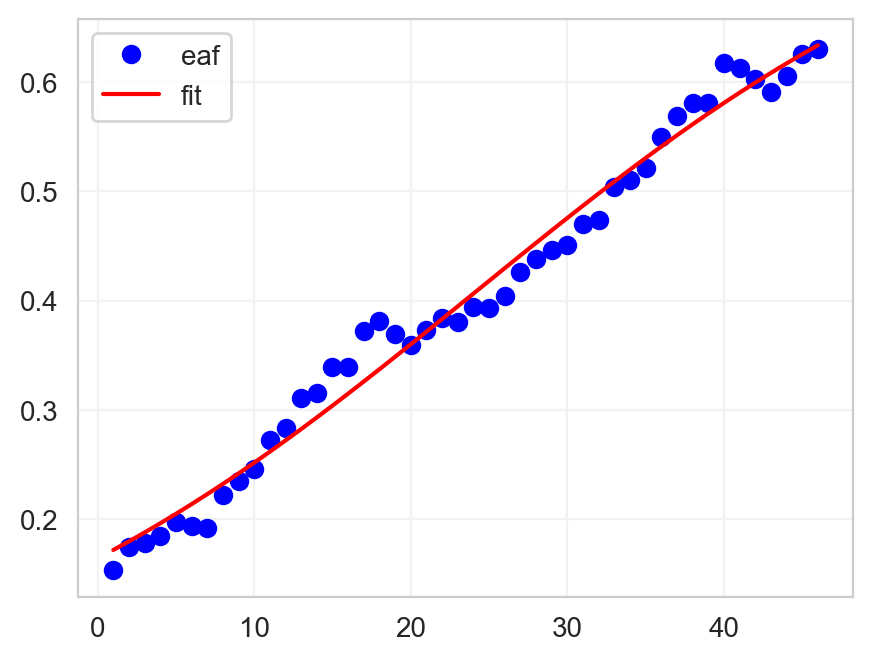

In [30]:
steel = pd.read_csv(poe5csv+'steel.csv')
t = np.asarray(steel.t)
eaf = np.asarray(steel.eaf)

def f(t,alpha,beta,delta):
    return alpha / (1+np.exp(-beta-delta*t))

def residual(params,t,eaf):
    alpha = params['alpha']
    beta = params['beta']
    delta = params['delta']
    model = f(t,alpha,beta,delta)
    return (eaf-model) 
    
params = Parameters()
params.add('alpha',value=1.) # initial guesses
params.add('beta',value=-1.)
params.add('delta',value=0.)

out = minimize(residual, params, args=(t,eaf))
report_fit(out)

print('\n------------- Fit Results Only ------------------')
print('Parameter    Value     Stderr')
for name, param in out.params.items():
    print(f"{name:7s} {param.value:11.5f} +- {param.stderr:7.5f}")
    
t_infl = -out.params['beta'].value / out.params['delta'].value
print(f"\nInflection point at t = {t_infl:.4f}")

p=out.params['alpha'].value,out.params['beta'].value,out.params['delta'].value

plt.plot(steel.t,steel.eaf,'bo',label='eaf')
plt.plot(steel.t,f(steel.t,p[0],p[1],p[2]),'r',label='fit')
plt.legend();

In [31]:
from scipy.optimize import curve_fit

def f(t,alpha,beta,delta):
    return alpha / (1+np.exp(-beta-delta*t))

t = steel.t
eaf = steel.eaf

sigma = np.ones(len(t))
p0 = np.array([1,-1,1])

p, pcov = curve_fit(f,t,eaf,p0,sigma)

pse = np.sqrt(np.diag(pcov))

print("Fit Results:")
print(f"alpha = {p[0]:7.4f} +- {pse[0]:.4f}")
print(f"beta  = {p[1]:7.4f} +- {pse[1]:.4f}")
print(f"delta = {p[2]:7.4f} +- {pse[2]:.4f}")

t_infl = -p[1]/p[2]
print(f"\nInflection point at t = {t_infl:.4f}")

Fit Results:
alpha =  0.8144 +- 0.0510
beta  = -1.3777 +- 0.0564
delta =  0.0572 +- 0.0043

Inflection point at t = 24.0756
